# Logs

Wireline logs, and 1D data in general, are a fundamental data type for subsurface scientists and engineers.

The data themselves are usually some physical measurement: conductivity of rock, speed of sound, natural radiation counts, volume of fluid, and so on.

The data points also have a set of 'coordinates' in time or space. For a wireline log, the coordinates are depths; for production data, they are timestamps. Often, there are multiple sets of coordinates to worry about, such as MD, TVDSS, and TWT for wireline logs.

A lot of our work as scientists and engineers comes down to wrangling data like this. Let's look at some.

## Data from the F3 dataset

Let's start off by loading some well data, to do this, we'll use a `function` that we'll look into at the end of this notebook, but for now we can just `call` it like we did with `print("Hello World!")` in the terminal/anaconda prompt:

In [1]:
# In the notebook:
from logs_1d_utils import get_GR, get_GR_np
from welly import Well

# Call the two functions and compare results
# TODO: replace path with url
Well.from_las
w = Well.from_las('./lasfiles/F02-1_logs.las')
gr = get_GR(w, dropna=True)
gr_np = get_GR_np(w, dropna=True)

gr[:5], gr_np[:5]

([3.0703, 2.7441, 2.6564, 2.6521, 2.032],
 array([3.0703, 2.7441, 2.6564, 2.6521, 2.032 ]))

We have now loaded some data. We made an **assignment**, which means giving a name (`gr`) to a data structure (a `list` full of numbers in this case), so we can now inspect `gr`:

In [2]:
gr

[3.0703,
 2.7441,
 2.6564,
 2.6521,
 2.032,
 1.7953,
 1.4786,
 1.3392,
 1.3392,
 1.7285,
 2.9567,
 4.0153,
 4.4301,
 4.7036,
 4.8807,
 5.109,
 5.2881,
 5.3052,
 5.3052,
 5.4608,
 5.6249,
 5.31,
 4.4738,
 3.8929,
 3.8929,
 4.295,
 4.9152,
 4.9152,
 4.9395,
 4.8545,
 4.5323,
 4.2718,
 3.9225,
 3.8972,
 3.6836,
 3.2261,
 3.1693,
 3.1693,
 3.1953,
 3.31,
 3.4477,
 4.3455,
 5.5534,
 6.1277,
 6.1491,
 6.3564,
 6.1211,
 5.9949,
 5.7919,
 5.7115,
 5.5694,
 4.9633,
 4.9592,
 4.9592,
 5.2512,
 5.2676,
 5.2676,
 4.7424,
 4.2328,
 3.7989,
 3.1139,
 3.0002,
 2.904,
 2.8819,
 3.0304,
 3.1464,
 3.3941,
 3.583,
 3.9703,
 4.247,
 4.6752,
 4.8436,
 4.8436,
 5.3656,
 5.6592,
 5.6592,
 4.8371,
 4.2736,
 4.2736,
 4.7067,
 5.0658,
 5.0658,
 4.4277,
 3.7723,
 3.7723,
 4.0717,
 4.964,
 5.6458,
 5.6458,
 5.509,
 5.292,
 5.292,
 5.3446,
 5.4499,
 5.4499,
 5.3796,
 5.2047,
 5.2047,
 5.3314,
 5.7632,
 5.8674,
 5.9982,
 6.5667,
 6.6535,
 6.4195,
 5.6942,
 5.5358,
 4.2013,
 3.2802,
 3.2297,
 2.7027,
 3.1111,
 3.111

As this is a very long log (how long in fact?), we'll just look at the first 10 values to learn about this data structure, the `list`:

In [3]:
len(gr)

9666

In [4]:
gr[0:10]

[3.0703, 2.7441, 2.6564, 2.6521, 2.032, 1.7953, 1.4786, 1.3392, 1.3392, 1.7285]

In [5]:
gr_ten = gr[0:10]
gr_ten

[3.0703, 2.7441, 2.6564, 2.6521, 2.032, 1.7953, 1.4786, 1.3392, 1.3392, 1.7285]

Notice that, for now, there are no coordinates, only the data.

This thing now exists in memory, with the name `gr_10` pointing at it. We can ask to see it:

In [6]:
gr_ten

[3.0703, 2.7441, 2.6564, 2.6521, 2.032, 1.7953, 1.4786, 1.3392, 1.3392, 1.7285]

But we can't do 'mathy' things with it in a particularly easy way:

In [7]:
gr_ten + 10 

# This results in an error:

TypeError: can only concatenate list (not "int") to list

Later on we'll meet NumPy and see how its `ndarray` data structure can help us with this.

We can plot it though! We need a library for this, plotting is not built into the core of Python. (Most things aren't; the core of Python just contains a few fundamental tools.)

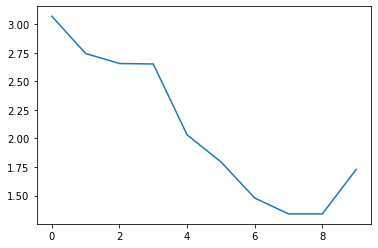

In [8]:
import matplotlib.pyplot as plt

plt.plot(gr_ten)

Another handy plot:

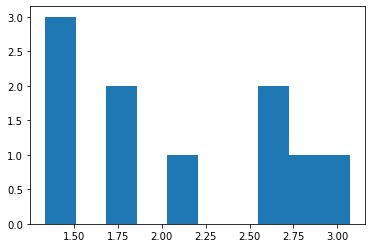

In [9]:
_ = plt.hist(gr_ten)

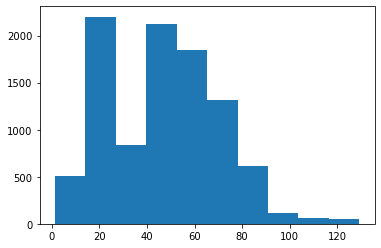

In [10]:
# And let's look at the whole data set too
_ = plt.hist(gr)

## What can `list` do?

This data structure has three important features:

- Its instances are sequences with concepts like length, membership, and iterability.
- Its instances are ordered collections that we can index and slice elements and subsequences from.
- Its instances have 'methods' attached to them, which are functions that access their data.

Let's explore!

In [11]:
gr_ten

[3.0703, 2.7441, 2.6564, 2.6521, 2.032, 1.7953, 1.4786, 1.3392, 1.3392, 1.7285]

In [12]:
# We'll talk about iterability in a minute.

# Length.
len(gr_ten)

10

In [13]:
# Membership.
2.032 in gr_ten

True

In [14]:
# Sortability.
sorted(gr_ten)  # Returns a copy, unlike list.sort() method.

[1.3392, 1.3392, 1.4786, 1.7285, 1.7953, 2.032, 2.6521, 2.6564, 2.7441, 3.0703]

In [15]:
# There's a built-in function to sum collections.
sum(gr_ten)

20.8357

In [16]:
# Indexing.
gr_ten[0], gr_ten[3], gr_ten[11], gr_ten[-1]  # Explain why -1.

IndexError: list index out of range

In [17]:
# Slicing.
gr_ten[5:8]  # 8 - 5 = 3 items.
gr_ten[:10]  # The first 10.
gr_ten[1:]   # All except the first.
gr_ten[:10:2]  # Every other.

[3.0703, 2.6564, 2.032, 1.4786, 1.3392]

In [18]:
# Assignment by index (but not slice).
gr_ten[0] = 100
gr_ten

# This CHANGES item 0, does not insert new item at 0 (method for that).
# Mutability. Be careful with it, often better to make a new thing.

[100, 2.7441, 2.6564, 2.6521, 2.032, 1.7953, 1.4786, 1.3392, 1.3392, 1.7285]

In [19]:
# Methods.
gr_ten.index(100)

0

In [20]:
# Append is easily the most useful; works in place (lists are mutable).
gr_ten.append(50)
gr_ten

[100,
 2.7441,
 2.6564,
 2.6521,
 2.032,
 1.7953,
 1.4786,
 1.3392,
 1.3392,
 1.7285,
 50]

## Iterability

Often we'd lile to step over the items in a collection, transforming them or somehow using them as we go. For example, we might collect the transformed versions in a new list ("remove the endings from these filenames") or perhaps we'll loop over a list of URLs, making web requests to each one in turn and collecting the results.

In [21]:
# Iterability.
# Earlier on I tried to add 10 to the GR log.

# This is a `for` loop. Notice:
#  - No counters or increments.
#  - We get each `n` from `gr` in turn.
for n in gr_ten:
    print(n + 10)

110
12.7441
12.6564
12.6521
12.032
11.7953
11.4786
11.3392
11.3392
11.7285
60


In [22]:
# GR hasn't changed:
gr_ten

[100,
 2.7441,
 2.6564,
 2.6521,
 2.032,
 1.7953,
 1.4786,
 1.3392,
 1.3392,
 1.7285,
 50]

In [23]:
# `n` was an actual assignment happening for each step in `gr`:
n

50

In [24]:
# To 'save' the transformed numbers, I need to collect them in a new list.
gr_out = []
for n in gr_ten:
    gr_out.append(n + 10)
gr_out

[110,
 12.7441,
 12.6564,
 12.6521,
 12.032,
 11.7953,
 11.4786,
 11.3392,
 11.3392,
 11.7285,
 60]

## `break` and `continue`

We loaded data in `gr` with no 'nan' values (so called for Not A Number), if we reload the data with those values we would get this situation:

In [25]:
gr_all = get_GR(w)
gr_all[:15]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 3.0703]

So now if we want to iterate over these values, we need some control at each step of the iteration, this is where `break` and `continue` can come in. First we'll use `numpy` to identify those `nan` values:

In [26]:
import numpy as np

In [27]:
gr_all[0]

nan

In [28]:
np.isnan(42), np.isnan(gr_all[0])

(False, True)

In [29]:
print(f'Len of all data: {len(gr_all)}')

gr_all_clean = []
for gr in gr_all:
    if np.isnan(gr):
        print(f'Skipping value: {gr}')
        continue
    else:
        gr_all_clean.append(gr)
        
print(f'Len of cleaned data: {len(gr_all_clean)}')

Len of all data: 9680
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Len of cleaned data: 9666


In [30]:
print(f'Len of all data: {len(gr_all)}')

for idx, gr in enumerate(gr_all):
    if np.isnan(gr):
        print(f'Bad value `{gr}` at idx `{idx}`, interrupting.')
        break

Len of all data: 9680
Bad value `nan` at idx `0`, interrupting.


## Comprehensions

There's an optional extra bit of Python syntax that can sometimes help write more readable code. Any time you're doing some transformation on a collection like this, you can write it as a 'comprehension'. 

In [31]:
gr_out = [n + 10 for n in gr_ten]
gr_out

[110,
 12.7441,
 12.6564,
 12.6521,
 12.032,
 11.7953,
 11.4786,
 11.3392,
 11.3392,
 11.7285,
 60]

If you find that harder to read than the `for` loop, just ignore it. You'll love it one day, but it can wait!

## Exercise

 - Create a list of numbers.
 - Make a new list that contains only the second half of your list.
 - Can you sort your list from largest to smallest?
 - Find the sum of the squares of the numbers in your list.
 - Append three new numbers to your list. Can you do it in one step? <a title="You might need to Google how to concatenate lists in Python.">HINT</a>

In [32]:
# YOUR CODE HERE



In [33]:
# Possible solutions here.
my_list = [1, 4, 5, 1, 3, 4, 65, 5, 1, 5]
print(my_list[len(my_list)//2:])
print(sorted(my_list))
sum_squares = sum([n**2 for n in my_list])
print(sum_squares)
my_list.extend([345, 987, -999])
print(my_list)

[4, 65, 5, 1, 5]
[1, 1, 1, 3, 4, 4, 5, 5, 5, 65]
4344
[1, 4, 5, 1, 3, 4, 65, 5, 1, 5, 345, 987, -999]


## Math on a `list` vs `np.ndarray`:

Remember that we could not do this:

In [34]:
my_list + 10

TypeError: can only concatenate list (not "int") to list

In [35]:
#np.array(my_list) + 10

In [36]:
#my_list * 2

In [37]:
#np.array(my_list) * 2

## Let's look into the function we used

In [38]:
get_GR??

In [39]:
get_GR_np??

## Boolean array

What is going on inside `get_GR_np`!?
You may be wondering what this line of code: `gr = gr[~np.isnan(gr)]` is actually doing, let's break it down to understand it:

In [40]:
test_arr   = np.array([1, 2, 3, 4, 5])
test_bools = np.array([True, True, False, True, False])
test_arr, test_bools

(array([1, 2, 3, 4, 5]), array([ True,  True, False,  True, False]))

In [41]:
# contiguous slicing
test_arr[0:3]

array([1, 2, 3])

In [42]:
# discontiguous slicing based on boolean array
test_arr[test_bools]

array([1, 2, 4])

In [43]:
test_gr = np.array([np.nan, 120, 80, 90, np.nan, 115, 90])
test_gr

array([ nan, 120.,  80.,  90.,  nan, 115.,  90.])

In [44]:
np.isnan(test_gr[0])

True

In [45]:
np.isnan(test_gr)

array([ True, False, False, False,  True, False, False])

In [46]:
test_gr[np.isnan(test_gr)]

array([nan, nan])

In [47]:
~np.isnan(test_gr)

array([False,  True,  True,  True, False,  True,  True])

In [48]:
test_gr[~np.isnan(test_gr)]

array([120.,  80.,  90., 115.,  90.])

### Booleans

`bool`s are either `True` or `False`. These can be very useful, most obviously for selectively running particular blocks of code.

Boolean values can be obtained in a number of ways. Many functions or methods will return either `True` or `False`. Comparisons also return a `bool`:

| Equal to | Not equal to | Less than | Greater than | Less than or equal | Greater than or equal |
|----------|--------------|-----------|--------------|--------------------|-----------------------|
|   `==`   |     `!=`     |    `<`    |      `>`     |        `<=`        |          `>=`         |

Different types will never be equal (that is, something like `1 == '1'` is `False`). If you want to know if something is the same object as another, then you should use `is` and `is not`.

Some objects contain others (for example lists), and membership within a collection can be tested with `in`, which gives a `True` or `False`.

We can also link expressions that are True or False together in a few ways:

| Operation 	| Result                                                           	|
|-----------	|------------------------------------------------------------------	|
| a **or** b    	| True if either a or b is true                                    	|
| a **and** b   	| False if either a or b is false,<br>True if both a and b are true |
| **not** a     	| True if a is true, else False                                    	|

In some cases (notably with numpy arrays) `&` and `|` are used instead of `and` and `or`. `&` and `|` are bitwise operators: they are only used on numbers, and work at the level of individual 1s and 0s. In most cases you will want `and` and `or` instead.

#### Truthiness

Some things are considered to be "truthy" (and will count as `True`) while others are "falsey" (counting as `False`). Examples of things that are falsey are the following:
* `0`
* `0.0`
* empty collections (such as an empty list `[]`, and empty versions of the other datastructures that we will cover in this notebook but have not seen yet),
* empty strings (`''` or `""`).

Most other things will be truthy.

Here is a simple example, but play around with more:

```python
e_list = []

if e_list:
    print('True!')
else:
    print('False!')
    
f_list = [0]

if f_list:
    print('True!')
else:
    print('False!')
```

## NEXT

To do any meaningful processing on data like this...

- We're going to need to meet strings.
- We're going to need booleans
- We're going to need if/else.

Let's come back to it.